In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [306]:
stu1 = pd.read_csv(r'C:\Users\Alon\Downloads\train\train\7554\SimpleTest\13.csv', parse_dates=[' Time'])

# Clearing DATA

### Fixing Col's titles

In [307]:
print("Len:", len(stu1))
stu1.info()

Len: 1205
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   X          1205 non-null   object        
 1    Y         1203 non-null   float64       
 2    Pressure  1203 non-null   float64       
 3    TiltX     1203 non-null   float64       
 4    TiltY     1203 non-null   float64       
 5    Time      1203 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 56.6+ KB


In [308]:
#Fixing the space before any column title:
stu1.columns = ['X', 'Y', 'Pressure', 'TiltX', 'TiltY', 'Time']
stu1.columns

Index(['X', 'Y', 'Pressure', 'TiltX', 'TiltY', 'Time'], dtype='object')

### Converting 'X' to float

In [309]:
#'X' col type is str.
type(stu1['X'][0])

str

In [310]:
#This happens cuz the last 2 rows, which are a summery
stu1[-2:]

,X,Y,Pressure,TiltX,TiltY,Time
1203,Time Elapsed till drawing started: 00:13.4325736,NaN,NaN,NaN,NaN,NaT
1204,Time Elapsed till drawing submit: 00:36.5318738,NaN,NaN,NaN,NaN,NaT


In [311]:
#If we remove them we can make 'X' col to float easly.
stu = stu1[0:-2]
stu.tail(5)

,X,Y,Pressure,TiltX,TiltY,Time
1198,367.159256265158,291.010047,0.733639,-1988.0,1259.0,2022-06-13 00:35:23
1199,371.372213881511,293.379836,0.685542,-1988.0,1259.0,2022-06-13 00:35:23
1200,372.583439196212,294.064442,0.667231,-1988.0,1259.0,2022-06-13 00:35:24
1201,376.480424991339,296.118258,0.608392,-1988.0,1259.0,2022-06-13 00:35:24
1202,377.849636216653,296.750202,0.558099,-1988.0,1259.0,2022-06-13 00:35:24


In [312]:
stu['X'] = pd.to_numeric(stu['X'], errors='coerce')
type(stu['X'][3])

numpy.float64

## Adding 'diff' col

In [313]:
stu["lag1"] = stu['Time'].shift(periods = 1)
stu.head()

,X,Y,Pressure,TiltX,TiltY,Time,lag1
0,713.411710,527.672941,0.290761,-4798.0,2043.0,2022-06-13 00:13:25,NaT
1,713.780344,527.462294,0.295644,-4798.0,2043.0,2022-06-13 00:13:26,2022-06-13 00:13:25
2,714.780922,526.777688,0.295644,-4798.0,2043.0,2022-06-13 00:13:27,2022-06-13 00:13:26
3,716.782076,524.934519,0.208728,-4798.0,2043.0,2022-06-13 00:13:28,2022-06-13 00:13:27
4,717.098048,523.775956,0.208728,-4798.0,2043.0,2022-06-13 00:13:29,2022-06-13 00:13:28


In [314]:
stu["diff"] = stu['Time'].sub(stu["lag1"])
stu.head(5)

,X,Y,Pressure,TiltX,TiltY,Time,lag1,diff
0,713.411710,527.672941,0.290761,-4798.0,2043.0,2022-06-13 00:13:25,NaT,NaT
1,713.780344,527.462294,0.295644,-4798.0,2043.0,2022-06-13 00:13:26,2022-06-13 00:13:25,0 days 00:00:01
2,714.780922,526.777688,0.295644,-4798.0,2043.0,2022-06-13 00:13:27,2022-06-13 00:13:26,0 days 00:00:01
3,716.782076,524.934519,0.208728,-4798.0,2043.0,2022-06-13 00:13:28,2022-06-13 00:13:27,0 days 00:00:01
4,717.098048,523.775956,0.208728,-4798.0,2043.0,2022-06-13 00:13:29,2022-06-13 00:13:28,0 days 00:00:01


In [315]:
#Let's make time units of measurement (for comparison)
op1 = stu["diff"][1] - stu["diff"][1] #0.00
op2 = stu["diff"][1] #0.01
op3 = stu["diff"][1] + stu["diff"][1] #0.02
print(op1)
print(op2)
print(op3)

0 days 00:00:00
0 days 00:00:01
0 days 00:00:02


In [316]:
#We decided that handlift will count if the diffrence between one point and he ***********************
stu[stu["diff"] > stu["diff"][1]*10]

,X,Y,Pressure,TiltX,TiltY,Time,lag1,diff
148,695.769950,310.179005,0.214343,-3522.0,2485.0,2022-06-13 00:16:13,2022-06-13 00:15:09,0 days 00:01:04
312,730.895484,386.907495,0.045884,-4043.0,325.0,2022-06-13 00:22:47,2022-06-13 00:17:50,0 days 00:04:57
569,588.181545,285.322555,0.117174,-4674.0,2662.0,2022-06-13 00:26:45,2022-06-13 00:25:54,0 days 00:00:51
674,373.268045,285.743850,0.013901,-3592.0,2330.0,2022-06-13 00:29:52,2022-06-13 00:27:51,0 days 00:02:01


###### Question C:

In [317]:
print("Hand lifts:", len(stu[stu["diff"] > stu["diff"][1]*10].dropna()))

Hand lifts: 4


#### Making indexlist named handlift:

In [318]:
#First, we will create our 'handlift' according to the way we calculated above.
handlift = stu[stu["diff"] > stu["diff"][1]*10].index

#Then we will insert the '0' index, cuz the draw start at this point.
#The function 'union()' sorts automaticlly.
handlift = handlift.union([0])
handlift

Int64Index([0, 148, 312, 569, 674], dtype='int64')

#### Making indexlist named totallines:

In [319]:
totallines = handlift
totallines

Int64Index([0, 148, 312, 569, 674], dtype='int64')

# Graph viewing

In [320]:
#Those parametrs are only for visualization
xmin = stu['X'].min() - 100
xmax = stu['X'].max() + 100
ymin = stu['Y'].min() - 100
ymax = stu['Y'].max() + 100

(263.525580321053, 925.160411132925, 110.70054278785099, 647.368518304654)

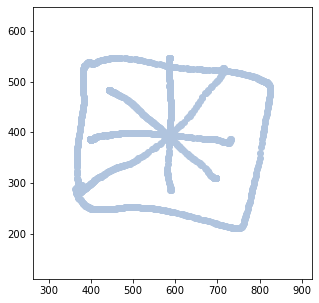

In [321]:
plt.figure(figsize=(5,5))
plt.plot(stu['X'], stu['Y'], 'o', color='lightsteelblue')
ax = plt.gca()
plt.axis([xmin, xmax, ymin, ymax])

##### This graph includes a thick line whenever the hand lifted

In [322]:
#Helpful function that recives 2 points and return the draw between them.
def part_print(x1, x2):
    plt.figure(figsize=(5,5))
    plt.plot(stu['X'][x1:x2], stu['Y'][x1:x2], 'o', mew=2)
    ax = plt.gca()
    plt.axis([xmin, xmax, ymin, ymax])
    plt.title(x1)

# Counting Lines

### Helpful functions:

In [323]:
#The function recives 2 points and returns the slope (SHIPUA) of the line bettwen them
def slopee(p1, p2): 
    return (stu['Y'][p1]-stu['Y'][p2]) / (stu['X'][p1]-stu['X'][p2])

In [324]:
#The function recives 2 points (in practice - a line) and return their length and avg pressure.
def avgLengthPres(p1, p2):
    print(f'Average pressure: {stu.Pressure[p1:p2].mean()}, length: {np.sqrt(pow(stu.X[p1] - stu.X[p2], 2) + pow(stu.Y[p1] - stu.Y[p2], 2))}')

In [326]:
#The function recives a point and returns True if it is "close" to another point* in the draw
#*Not including its continune
def is_close(p1):
    #We assume that 2 point are called "close" if their distance is "DEFINED_CLOSE" or closer.
    #We diagnosed 4 as the optimal value for DEFINED_CLOSE.
    #1 and 2 are too small sometimes, so 3 is the minimum and we chose 4 for ensuring.
    DEFINED_CLOSE = 4
    
    #SKIP is a range that we use to make sure our function will not count points such p1+1 as closed.
    SKIP = 40    
    
    if (p1 == 0):
        #If there isn't a close point for the start of the draw, the draw is open.
        if (len(stu[stu.index > stu.index[p1+SKIP]][abs(stu['X'].sub(stu['X'][p1]))
                <= DEFINED_CLOSE][abs(stu['Y'].sub(stu['Y'][p1])) <= DEFINED_CLOSE]) == 0):
            #print("error1", p1)
            return False
    else:
        #For each line that stop by lifting hand, check if there is a continune
        if ((len(stu[stu.index > stu.index[p1-1]][abs(stu['X'].sub(stu['X'][p1-1])) <= DEFINED_CLOSE]
            [abs(stu['Y'].sub(stu['Y'][p1])) <= DEFINED_CLOSE]) == 0)
            and 
            (len(stu[stu.index < stu.index[p1-1] - SKIP][abs(stu['X'].sub(stu['X'][p1-1]))
            <= DEFINED_CLOSE][abs(stu['Y'].sub(stu['Y'][p1])) <= DEFINED_CLOSE]) == 0)):
            #print("error2", p1)
            return False    
    
    return True

## Counting:

###### Question A:

In [327]:
lines = len(handlift) #The count of lines till yet, which is equal to the count of hand lifting.
next = 0 #used as an index, always: next = i+1

#Those next 3 are set by us
TAIL = 35 #Avoiding the great changes of the edges
SKIP = TAIL #Insted of checking each point, we're checking intervals.
STRIGHT = 0.7 #Number that we diagnosed to check diffrences between lines.
    
#helpful functions we use:
    #slopee(p1, p2) - Calculate the slope (SHIPUA) between 2 points.
    #arctan(num) - Trigonomatric function

if (len(handlift) > 1):          
    for j in handlift[:-1]:
        next += 1
        for i in range(j, handlift[next]-2*TAIL, SKIP):
            x1 = i
            x2 = i+SKIP
            #print("(", x1, "," ,x2, "): angle: ", abs(np.arctan(slopee(x1, x2))))
            
            if (abs((abs(np.arctan(slopee(x1, x2)))) - (abs(np.arctan(slopee(x1+SKIP, x2+SKIP))))) > STRIGHT):
                totallines = totallines.union([i+SKIP])
                lines += 1
                
#Now we will check the part last part:
for i in range(handlift[next], len(stu)-TAIL, SKIP):      
        x1 = i
        x2 = i+SKIP           
        #print("(", x1, "," ,x2, "): angle: ", abs(np.arctan(slopee(x1, x2))))
        
        if (abs((abs(np.arctan(slopee(x1, x2)))) - (abs(np.arctan(slopee(x1+SKIP, x2+SKIP))))) > STRIGHT):
                totallines = totallines.union([i+SKIP])
                lines += 1
                
        if (x2 >= len(stu)-2*TAIL):
            #print("stop")
            break
        
print(f'Lines: {lines}')

Lines: 9


## Now we can use visualization for the lines

In [328]:
print(handlift)
print(totallines)

Int64Index([0, 148, 312, 569, 674], dtype='int64')
Int64Index([0, 148, 312, 569, 674, 814, 954, 1024, 1164], dtype='int64')


(263.525580321053, 925.160411132925, 110.70054278785099, 647.368518304654)

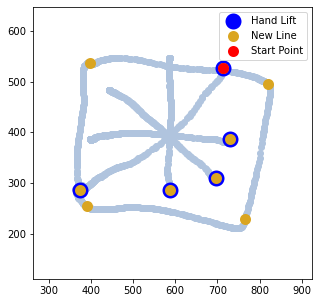

In [329]:
plt.figure(figsize=(5,5))
plt.plot(stu['X'], stu['Y'], 'o', color='lightsteelblue')

plt.plot(stu['X'][handlift], stu['Y'][handlift], 'o', color = 'blue', mew=10, label='Hand Lift')

plt.plot(stu['X'][totallines], stu['Y'][totallines], 'o', color = 'goldenrod', mew=5, label='New Line')

plt.plot(stu['X'][0], stu['Y'][0], 'or', mew=5, label='Start Point')

plt.legend()

ax = plt.gca()
plt.axis([xmin, xmax, ymin, ymax])

## Calculating average and pressure for each line

###### Question B:

In [330]:
next = 1

#Why if? cuz the last line is untill the end of the draw, which its index is not in "totallines"
if (len(totallines) > 1):
    for line in totallines[:-1]:
        print(f'Line {next}:')
        avgLengthPres(line, totallines[next])
        next += 1
        
print(f'Line {next}:')
avgLengthPres(totallines[-1], len(stu)-1)

Line 1:
Average pressure: 0.59062106172378, length: 218.20825901886923
Line 2:
Average pressure: 0.2781604353065898, length: 84.38639947021849
Line 3:
Average pressure: 0.48105835942152875, length: 175.17639281224345
Line 4:
Average pressure: 0.497736945890245, length: 214.9139133376585
Line 5:
Average pressure: 0.5784202600696258, length: 252.60818532641642
Line 6:
Average pressure: 0.7446947685309819, length: 424.3303565573441
Line 7:
Average pressure: 0.7503205410071782, length: 271.8713319091118
Line 8:
Average pressure: 0.7402757559503828, length: 375.6163154940961
Line 9:
Average pressure: 0.7370308370966662, length: 45.14003340917366


## Is the draw opened or closed?

###### Question D:

In [331]:
flag = True
for lift in handlift:
    if (is_close(lift) == False):
        flag = False
        break

if (flag):
    print("The draw is CLOSED")
else:
    print("The draw is OPENED")

The draw is OPENED
